<a href="https://colab.research.google.com/github/FranziskoB/Gradient_boosting/blob/main/Boosting_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelagem de 'human activity recognition

###Sobre o conjunto de dados
O banco de dados de Reconhecimento de Atividade Humana foi construído a partir das gravações de 30 participantes do estudo realizando atividades da vida diária (AVD) enquanto carregavam um smartphone montado na cintura com sensores inerciais embutidos. O objetivo é classificar as atividades em uma das seis atividades realizadas.

###Descrição do experimento
Os experimentos foram realizados com um grupo de 30 voluntários na faixa etária de 19 a 48 anos. Cada pessoa realizou seis atividades (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) usando um smartphone (Samsung Galaxy S II) na cintura. Usando seu acelerômetro e giroscópio incorporados, capturamos aceleração linear 3-axial e velocidade angular 3-axial a uma taxa constante de 50 Hz. Os experimentos foram gravados em vídeo para rotular os dados manualmente. O conjunto de dados obtido foi particionado aleatoriamente em dois conjuntos, onde 70% dos voluntários foram selecionados para gerar os dados de treinamento e 30% os dados de teste.

Os sinais dos sensores (acelerômetro e giroscópio) foram pré-processados pela aplicação de filtros de ruído e então amostrados em janelas deslizantes de largura fixa de 2,56 segundos e 50% de sobreposição (128 leituras/janela). O sinal de aceleração do sensor, que possui componentes gravitacionais e de movimento corporal, foi separado usando um filtro passa-baixa Butterworth em aceleração corporal e gravidade. A força gravitacional é assumida como tendo apenas componentes de baixa frequência, portanto, um filtro com frequência de corte de 0,3 Hz foi usado. De cada janela, um vetor de características foi obtido calculando variáveis do domínio do tempo e da frequência.

Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

importando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train= pd.read_csv("/content/drive/MyDrive/MBA DSA/HAR_train.csv")
test= pd.read_csv("/content/drive/MyDrive/MBA DSA/HAR_test.csv")

visualizando os dados

In [ ]:
test.head(5)

,V1,X1tBodyAcc.mean.X,X2tBodyAcc.mean.Y,X3tBodyAcc.mean.Z,X4tBodyAcc.td.X,X5tBodyAcc.td.Y,X6tBodyAcc.td.Z,X7tBodyAcc.mad.X,X8tBodyAcc.mad.Y,X9tBodyAcc.mad.Z,...,X553fBodyBodyGyroJerkMag.kewne,X554fBodyBodyGyroJerkMag.kurtoi,X555angletBodyAccMeangravity,X556angletBodyAccJerkMeangravityMean,X557angletBodyGyroMeangravityMean,X558angletBodyGyroJerkMeangravityMean,X559angleXgravityMean,X560angleYgravityMean,X561angleZgravityMean,y
0,5,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,em pé
1,5,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,em pé
2,5,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,em pé
3,5,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,em pé
4,5,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,em pé


In [ ]:
import plotly.express as px
freq=pd.DataFrame(train.y.value_counts())
fig = px.bar(freq, x=freq.index, y='y',title="Distribuição de frequencia das variáveis")
fig.update_layout(
    xaxis_title="Tipo de movimento/posição",
    yaxis_title="Frequencia",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

## Criando o primeiro modelo usando random forest

In [ ]:
treino_x=train.drop(['y', 'V1'], axis=1)
teste_x=test.drop(['y', 'V1'], axis=1)

In [ ]:
treino_y=train.y
teste_y=test.y

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Treinar uma Random Forest com 5 árvores

modelo_rf = RandomForestClassifier(n_estimators=5
                             , ccp_alpha = .005
                             , class_weight = "balanced")
modelo_rf.fit(treino_x, treino_y)
previsoes = modelo_rf.predict(teste_x)

acuracia_rf = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia_rf)

A acurácia foi 87.24%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

     andando       0.83      0.91      0.87       496
     deitado       1.00      1.00      1.00       537
    descendo       0.94      0.82      0.87       420
       em pé       0.83      0.80      0.81       532
     sentado       0.79      0.82      0.80       491
     subindo       0.86      0.88      0.87       471

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.87      0.87      0.87      2947



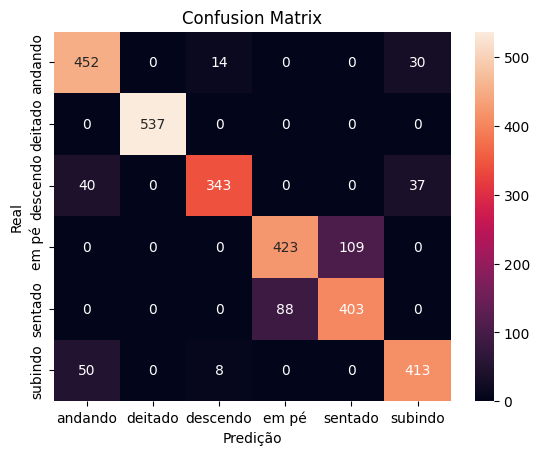

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(teste_y, previsoes, labels=None, sample_weight=None)

# Plot

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predição')
ax.set_ylabel('Real')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['andando','deitado' ,'descendo' ,'em pé' , 'sentado','subindo']); ax.yaxis.set_ticklabels(['andando','deitado' ,'descendo' ,'em pé' , 'sentado','subindo']);
plt.show()

###Otimização dos hiperparametros

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Número de árvores
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 20)]
#Número de caracteristicas a serem considerados em cada divisão
max_features = ['auto', 'sqrt']
# Número máximo de níveis na árvore
max_depth = [int(x) for x in np.linspace(10, 20, num = 10)]
max_depth.append(None)
# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2, 5, 10]
# Número mínimo de amostras necessárias em cada nó folha
min_samples_leaf = [1, 2, 4]
# Método de seleção de amostras para treinar cada árvore
bootstrap = [True, False]
# Criando o random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use a random grid para procurar os melhores hiperparâmetros

rf = RandomForestClassifier()
# Random search de parametros, usando 3 fold cross validation,
# Pesquisando em 20 combinações diferentes e use todos os núcleos disponíveis
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit o random search model
rf_random.fit(treino_x, treino_y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 29, 38, 48, 57, 67,
                                                         76, 86, 95, 105, 114,
                                                         124, 133, 143, 152,
                                                         162, 171, 181, 190,
                                                         200]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_ #Melhores parâmetros encontrados

{'n_estimators': 114,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
modelo_rf_tun = rf_random.best_estimator_
modelo_rf_tun.fit(treino_x, treino_y)
previsoes = modelo_rf_tun.predict(teste_x)

acuracia_rf_tun = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % acuracia_rf_tun)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



A acurácia foi de 92.16%


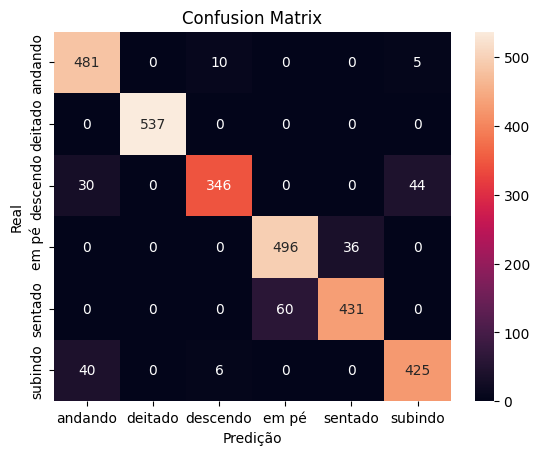

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(teste_y, previsoes, labels=None, sample_weight=None)

# Plot

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predição')
ax.set_ylabel('Real')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['andando','deitado' ,'descendo' ,'em pé' , 'sentado','subindo']); ax.yaxis.set_ticklabels(['andando','deitado' ,'descendo' ,'em pé' , 'sentado','subindo']);
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

     andando       0.87      0.97      0.92       496
     deitado       1.00      1.00      1.00       537
    descendo       0.96      0.82      0.88       420
       em pé       0.89      0.93      0.91       532
     sentado       0.92      0.88      0.90       491
     subindo       0.90      0.90      0.90       471

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



##Criando o segundo modelo usando gradient boosting

In [ ]:
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
modelo_GB=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

modelo_GB.fit(treino_x, treino_y)
previsoes = modelo_GB.predict(teste_x)

acuracia_GB = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia_GB)

A acurácia foi 95.08%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

     andando       0.95      0.97      0.96       496
     deitado       1.00      1.00      1.00       537
    descendo       0.97      0.90      0.94       420
       em pé       0.92      0.96      0.94       532
     sentado       0.95      0.90      0.93       491
     subindo       0.92      0.96      0.94       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



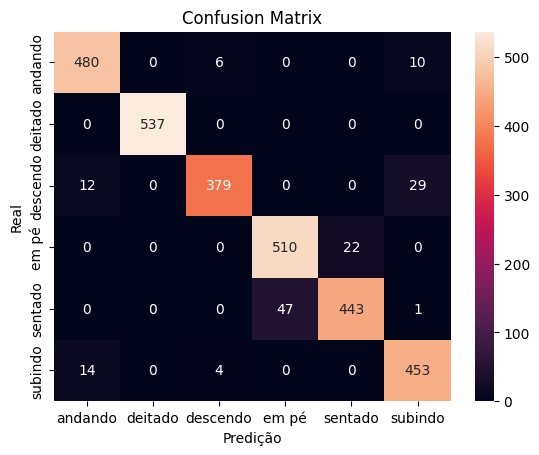

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(teste_y, previsoes, labels=None, sample_weight=None)

# Plot

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predição')
ax.set_ylabel('Real')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['andando','deitado' ,'descendo' ,'em pé' , 'sentado','subindo']); ax.yaxis.set_ticklabels(['andando','deitado' ,'descendo' ,'em pé' , 'sentado','subindo']);
plt.show()

###Otimização dos hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.05],# Número de árvores

    'n_estimators':[100],# Taxa de aprendizado

}


gb = GradientBoostingClassifier()

modelo_GB_tun = GridSearchCV(gb, grid, cv = 4)

modelo_GB_tun.fit(treino_x, treino_y)

print("Best Parameters:",modelo_GB_tun.best_params_)

print("Train Score:",modelo_GB_tun.best_score_)

print("Test Score:",modelo_GB_tun.score(teste_x, teste_y))

Best Parameters: {'learning_rate': 0.05, 'n_estimators': 100}
Train Score: 0.9103645266594124
Test Score: 0.9267051238547676
